In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
% matplotlib inline 

In [2]:
por = pd.read_csv('/Users/michael/Downloads/student/student-mat.csv', sep = ';')
mat = pd.read_csv('/Users/michael/Downloads/student/student-por.csv', sep = ';')
mat['class'] = 1 
por['class'] = 0 
df = pd.concat([mat, por])

In [3]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [4]:
df['schoolsup'] = df['schoolsup'].map(lambda x: 1 if x == 'yes' else 0)
df['famsup'] = df['famsup'].map(lambda x: 1 if x == 'yes' else 0)
df['paid'] = df['paid'].map(lambda x: 1 if x == 'yes' else 0)
df['activities'] = df['activities'].map(lambda x: 1 if x == 'yes' else 0)
df['nursery'] = df['nursery'].map(lambda x: 1 if x == 'yes' else 0)
df['higher'] = df['higher'].map(lambda x: 1 if x == 'yes' else 0)
df['internet'] = df['internet'].map(lambda x: 1 if x == 'yes' else 0)
df['romantic'] = df['romantic'].map(lambda x: 1 if x == 'yes' else 0)
df['school'] = df['school'].map(lambda x: 1 if x == 'GP' else 0)
df['sex'] = df['sex'].map(lambda x: 1 if x == 'F' else 0)
df['address'] = df['address'].map(lambda x: 1 if x == 'U' else 0)
df['famsize'] = df['famsize'].map(lambda x: 1 if x == 'GT3' else 0)
df['Pstatus'] = df['Pstatus'].map(lambda x: 1 if x == 'A' else 0)

In [5]:
unique = list(df['Mjob'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['Mjob'] = df['Mjob'].apply(lambda x: unique_n[x])
unique = list(df['Fjob'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['Fjob'] = df['Fjob'].apply(lambda x: unique_n[x])
unique = list(df['reason'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['reason'] = df['reason'].apply(lambda x: unique_n[x])
unique = list(df['guardian'].unique())
unique_n = {y:x for x, y in enumerate(unique)}
df['guardian'] = df['guardian'].apply(lambda x: unique_n[x])

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,1,1,18,1,1,1,4,4,0,0,...,3,4,1,1,3,4,0,11,11,1
1,1,1,17,1,1,0,1,1,0,1,...,3,3,1,1,3,2,9,11,11,1
2,1,1,15,1,0,0,1,1,0,1,...,3,2,2,3,3,6,12,13,12,1
3,1,1,15,1,1,0,4,2,1,2,...,2,2,1,1,5,0,14,14,14,1
4,1,1,16,1,1,0,3,3,2,1,...,3,2,1,2,5,0,11,13,13,1


In [7]:
x.columns

NameError: name 'x' is not defined

In [8]:
# df['grade'] = df['G3']
# df = df.drop(['G1','G2','G3'], 1)

In [9]:
# origin x and y
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
x_new = df[['class','absences','health','age','Mjob','studytime','freetime','Walc','Fjob']]
y_n = df.iloc[:,-1]

In [11]:
y.value_counts()

1    649
0    395
Name: class, dtype: int64

In [12]:
y1 = []
for i in df.iloc[:,-1]:
    if i <= 5:
        y1.append(0)
    elif i <= 10:
        y1.append(1)
    elif i <= 15:
        y1.append(2)
    elif i <= 20:
        y1.append(3)

In [13]:
from sklearn.cross_validation import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.5, random_state=3)

from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# try other ensemble methods (random forest=, extra tree, adaboost, gradient boosting)
rfdt = RandomForestClassifier(random_state=3)
etdt = ExtraTreesClassifier(random_state=3)
abdt = AdaBoostClassifier(random_state=3)
gbdt = GradientBoostingClassifier(random_state=3)

# apply those models to the train set 
result_rfdt = rfdt.fit(x_train,y_train)
result_etdt = etdt.fit(x_train,y_train)
result_abdt = abdt.fit(x_train,y_train)
result_gbdt = gbdt.fit(x_train,y_train)

# print out the accuracy scores 
print "Random Forest Accuracy Score: " + str(result_rfdt.score(x_test,y_test))
print "Extra Tree Accuracy Score: " + str(result_etdt.score(x_test,y_test))
print "Ada Boost Accuracy Score: " + str(result_abdt.score(x_test,y_test))
print "Gradient Boosting Accuracy Score: " + str(result_gbdt.score(x_test,y_test))

ValueError: BinomialDeviance requires 2 classes.

In [8]:
# create the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
predictions = result_gbdt.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print cm

NameError: name 'result_gbdt' is not defined

In [93]:
# create a function that plot the confusion matrix 
import matplotlib.patheffects as path_effects
# function that plots confusion matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels= [1,2,3], cmap=plt.cm.Blues, t_number =2):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(t_number)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()]) #The last line here adds a text outline

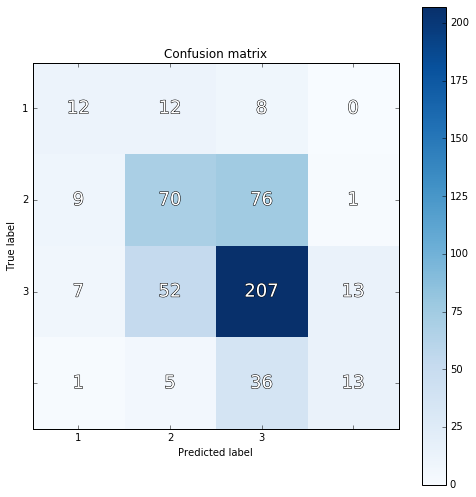

In [130]:
# plot confusion matrix
import numpy as np
plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Blues,t_number =4)

In [131]:
feature_importances = pd.DataFrame(rfdt.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Decision Tree:'
feature_importances.head(10)

Decision Tree:


,importance
absences,0.079100
failures,0.053730
goout,0.050651
Walc,0.049894
age,0.048558
Fedu,0.048081
Medu,0.048068
studytime,0.047324
reason,0.044760
famrel,0.041264


In [132]:
feature_importances = pd.DataFrame(etdt.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Decision Tree:'
feature_importances.head(10)

Decision Tree:


,importance
absences,0.061699
failures,0.060175
class,0.050331
Medu,0.042568
Mjob,0.041912
health,0.041454
Fedu,0.040431
Fjob,0.040273
studytime,0.040187
Walc,0.038478


In [133]:
feature_importances = pd.DataFrame(abdt.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Decision Tree:'
feature_importances.head(10)

Decision Tree:


,importance
class,0.14
absences,0.10
failures,0.10
Dalc,0.10
famrel,0.08
romantic,0.06
goout,0.06
Fjob,0.04
traveltime,0.04
reason,0.04


In [136]:
feature_importances = pd.DataFrame(gbdt.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head(15)

,importance
absences,0.105902
age,0.062106
failures,0.055636
freetime,0.054179
famrel,0.045697
Mjob,0.044952
reason,0.043629
Walc,0.041068
health,0.040086
Fjob,0.039964


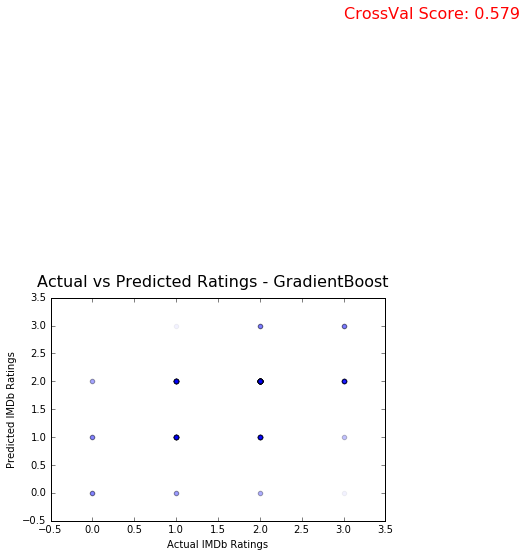

In [147]:
# plt.figure(figsize = (16,12))
plt.scatter(y_test,predictions, alpha = 0.05)
#m,b = np.polyfit(y_test,gbpreds,1)
#plt.plot(y_test,(m*y_test+b), linewidth=1, color='black')
plt.suptitle('Actual vs Predicted Ratings - GradientBoost', fontsize=16)
plt.text(3,8.5,'CrossVal Score: %s' % str(round(result_gbdt.score(x_test,y_test),3)),fontsize = 16,color= 'r')
plt.xlabel('Actual IMDb Ratings')
plt.ylabel('Predicted IMDb Ratings')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116d71290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117a91990>]], dtype=object)

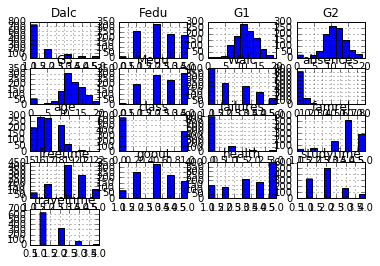

In [34]:
df.hist()